# 01. 탐색적 데이터 분석

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
sub = pd.read_csv("data/sample_submission.csv")
age = pd.read_csv("data/age_gender_info.csv")

train.shape, test.shape, sub.shape, age.shape

((2952, 15), (1022, 14), (150, 2), (16, 23))

In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

In [54]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          1022 non-null   object 
 1   총세대수                          1022 non-null   int64  
 2   임대건물구분                        1022 non-null   object 
 3   지역                            1022 non-null   object 
 4   공급유형                          1022 non-null   object 
 5   전용면적                          1022 non-null   float64
 6   전용면적별세대수                      1022 non-null   int64  
 7   공가수                           1022 non-null   float64
 8   자격유형                          1020 non-null   object 
 9   임대보증금                         842 non-null    object 
 10  임대료                           842 non-null    object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  980 non-null    float64
 12  도보 10분거리 내 버스정류장 수            1022 non-null   float64
 13  단지내

### train set, test set column 비교
* '등록차량수' 컬럼을 제외하고는 train set, test set의 column은 같다

In [55]:
train.columns, test.columns

(Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
        '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
        '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수'],
       dtype='object'),
 Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
        '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
        '도보 10분거리 내 버스정류장 수', '단지내주차면수'],
       dtype='object'))

* 컬럼명 변경

In [56]:
train.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '10분내지하철수',
       '10분내버스정류장수', '단지내주차면수', '등록차량수']

test.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '10분내지하철수',
       '10분내버스정류장수', '단지내주차면수']

In [57]:
train.head(20)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
5,C2483,900,아파트,경상북도,국민임대,51.95,89,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
6,C2483,900,아파트,경상북도,국민임대,51.95,135,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
7,C2483,900,아파트,경상북도,국민임대,59.88,86,38.0,A,30357000,214270,0.0,3.0,1425.0,1015.0
8,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0,205.0
9,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0,205.0


In [58]:
train.describe()

,총세대수,전용면적,전용면적별세대수,공가수,10분내지하철수,10분내버스정류장수,단지내주차면수,등록차량수
count,2952.000000,2952.000000,2952.000000,2952.000000,2741.000000,2948.000000,2952.000000,2952.000000
mean,886.661247,44.757215,102.747967,12.921070,0.176578,3.695726,601.668360,559.768293
std,513.540168,31.874280,132.640159,10.778831,0.427408,2.644665,396.407072,433.375027
min,26.000000,12.620000,1.000000,0.000000,0.000000,0.000000,13.000000,13.000000
25%,513.500000,32.100000,14.000000,4.000000,0.000000,2.000000,279.250000,220.000000
50%,779.000000,39.930000,60.000000,11.000000,0.000000,3.000000,517.000000,487.000000
75%,1106.000000,51.562500,144.000000,20.000000,0.000000,4.000000,823.000000,770.000000
max,2568.000000,583.400000,1865.000000,55.000000,3.000000,20.000000,1798.000000,2550.000000


In [59]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

<AxesSubplot:>

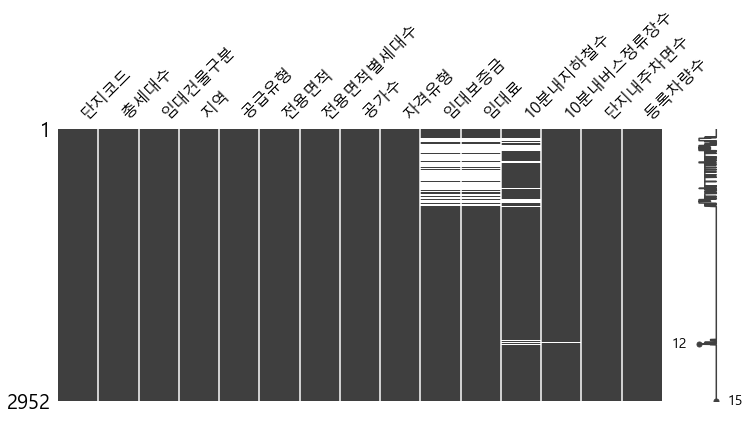

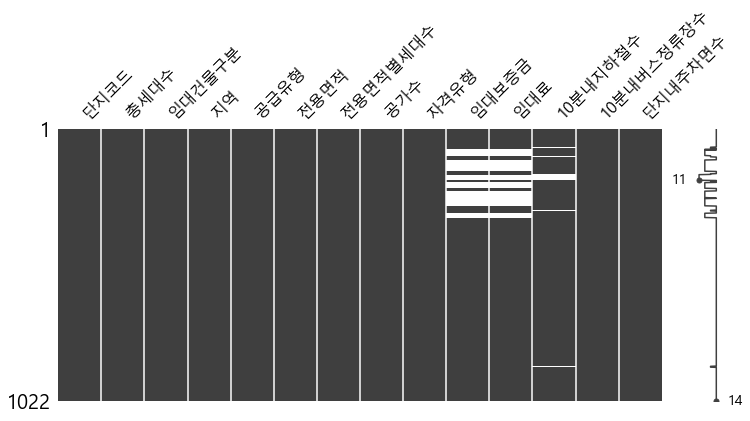

In [60]:
#null인 데이터를 시각화 해주는 라이브러리
import missingno as msno

msno.matrix(train, figsize=(12,5))
msno.matrix(test, figsize=(12,5))

In [61]:
train.isnull().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            0
임대보증금         569
임대료           569
10분내지하철수      211
10분내버스정류장수      4
단지내주차면수         0
등록차량수           0
dtype: int64

In [62]:
test.isnull().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            2
임대보증금         180
임대료           180
10분내지하철수       42
10분내버스정류장수      0
단지내주차면수         0
dtype: int64

array([[<AxesSubplot:title={'center':'총세대수'}>,
        <AxesSubplot:title={'center':'전용면적'}>,
        <AxesSubplot:title={'center':'전용면적별세대수'}>],
       [<AxesSubplot:title={'center':'공가수'}>,
        <AxesSubplot:title={'center':'10분내지하철수'}>,
        <AxesSubplot:title={'center':'10분내버스정류장수'}>],
       [<AxesSubplot:title={'center':'단지내주차면수'}>,
        <AxesSubplot:title={'center':'등록차량수'}>, <AxesSubplot:>]],
      dtype=object)

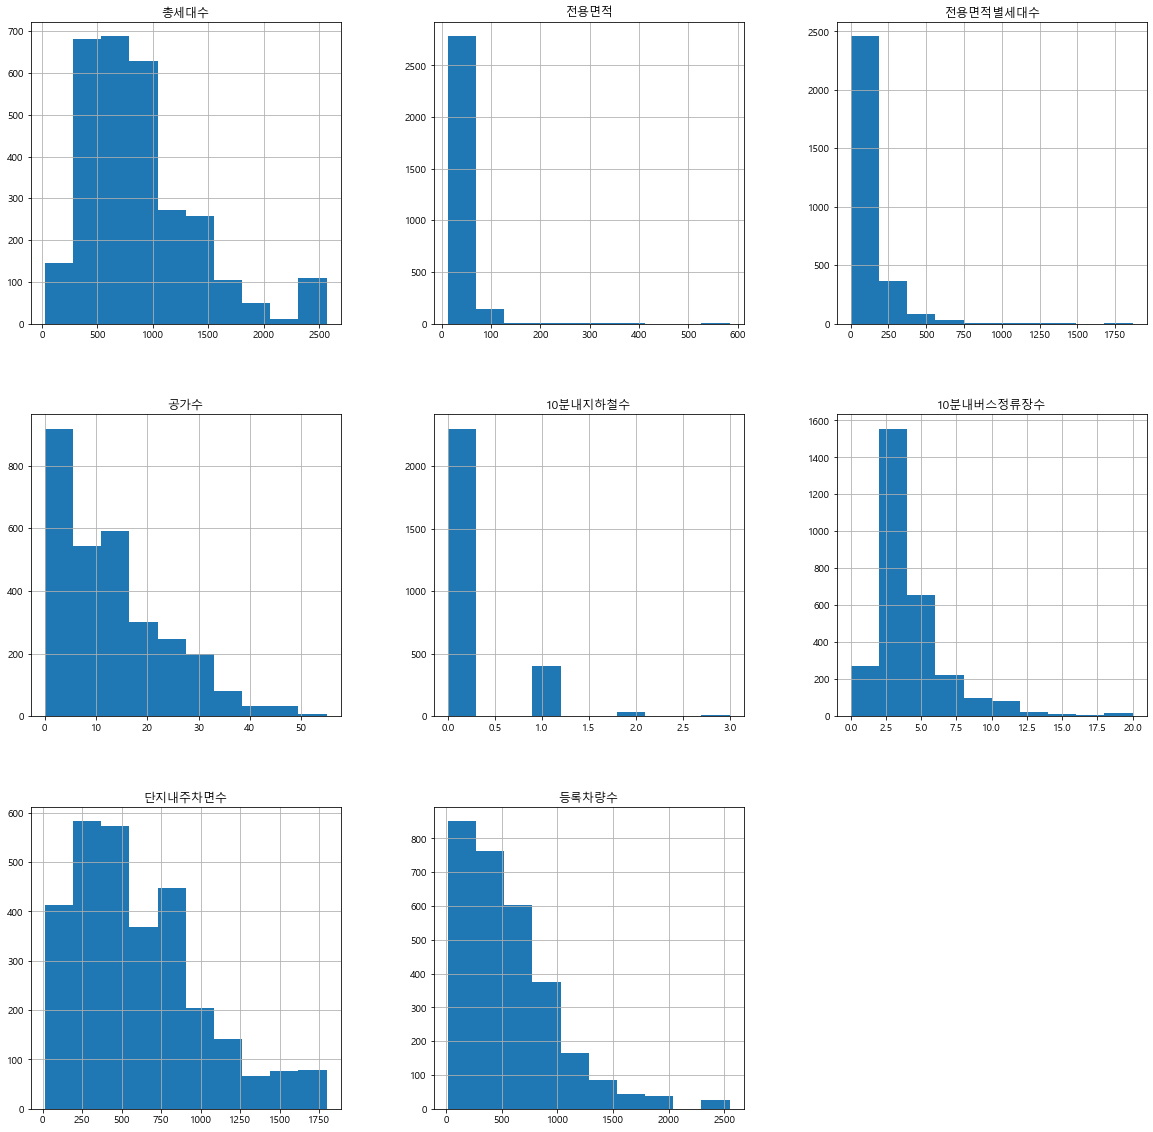

In [63]:
train.hist(figsize = (20,20))

array([[<AxesSubplot:title={'center':'총세대수'}>,
        <AxesSubplot:title={'center':'전용면적'}>,
        <AxesSubplot:title={'center':'전용면적별세대수'}>],
       [<AxesSubplot:title={'center':'공가수'}>,
        <AxesSubplot:title={'center':'10분내지하철수'}>,
        <AxesSubplot:title={'center':'10분내버스정류장수'}>],
       [<AxesSubplot:title={'center':'단지내주차면수'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

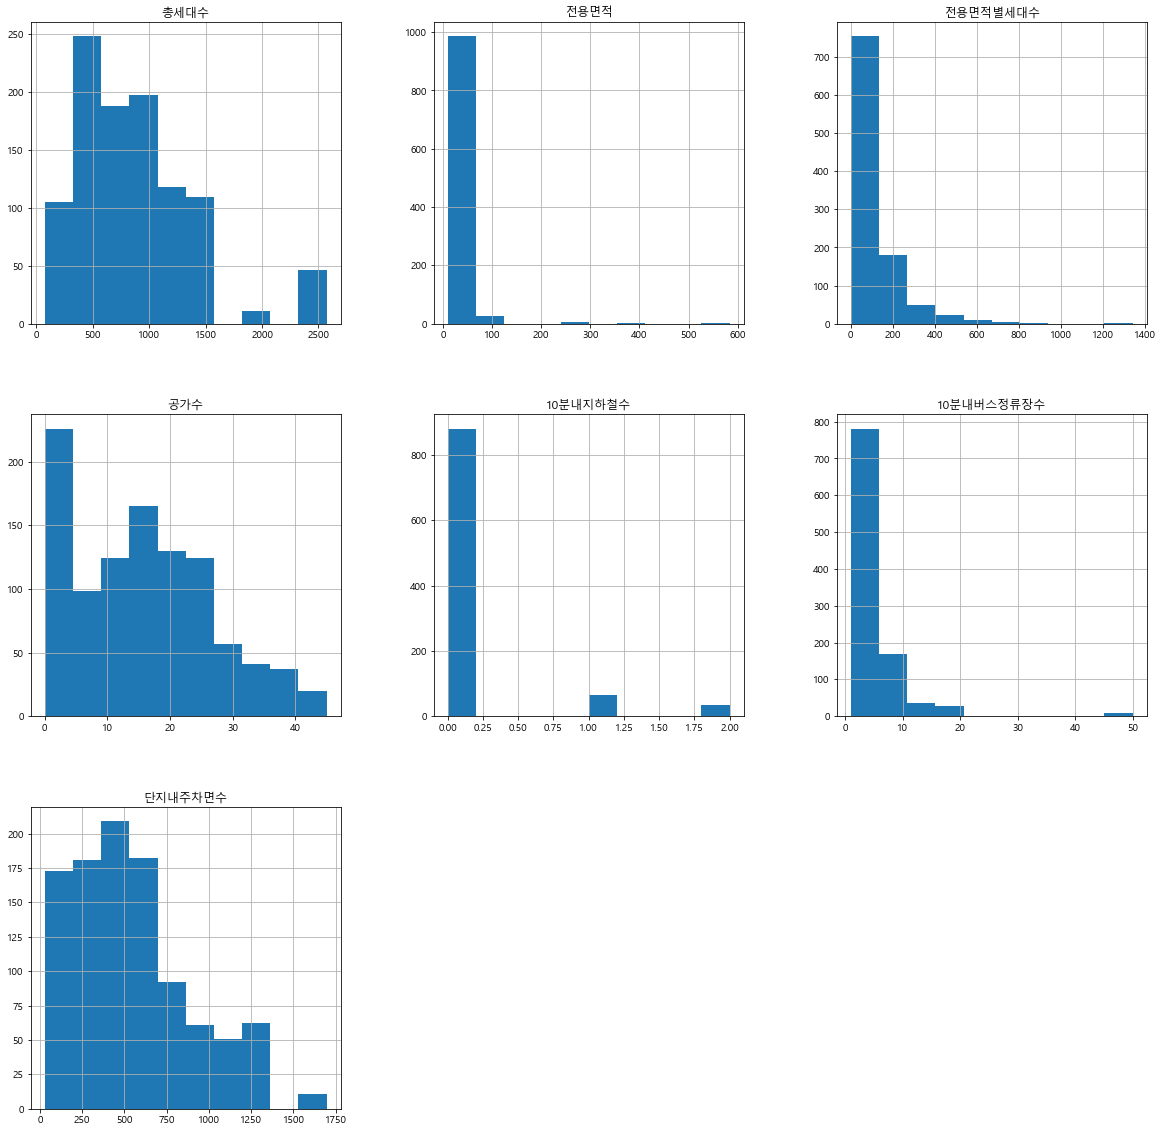

In [64]:
test.hist(figsize = (20,20))

array([[<AxesSubplot:xlabel='총세대수', ylabel='총세대수'>,
        <AxesSubplot:xlabel='전용면적', ylabel='총세대수'>,
        <AxesSubplot:xlabel='전용면적별세대수', ylabel='총세대수'>,
        <AxesSubplot:xlabel='공가수', ylabel='총세대수'>,
        <AxesSubplot:xlabel='10분내지하철수', ylabel='총세대수'>,
        <AxesSubplot:xlabel='10분내버스정류장수', ylabel='총세대수'>,
        <AxesSubplot:xlabel='단지내주차면수', ylabel='총세대수'>,
        <AxesSubplot:xlabel='등록차량수', ylabel='총세대수'>],
       [<AxesSubplot:xlabel='총세대수', ylabel='전용면적'>,
        <AxesSubplot:xlabel='전용면적', ylabel='전용면적'>,
        <AxesSubplot:xlabel='전용면적별세대수', ylabel='전용면적'>,
        <AxesSubplot:xlabel='공가수', ylabel='전용면적'>,
        <AxesSubplot:xlabel='10분내지하철수', ylabel='전용면적'>,
        <AxesSubplot:xlabel='10분내버스정류장수', ylabel='전용면적'>,
        <AxesSubplot:xlabel='단지내주차면수', ylabel='전용면적'>,
        <AxesSubplot:xlabel='등록차량수', ylabel='전용면적'>],
       [<AxesSubplot:xlabel='총세대수', ylabel='전용면적별세대수'>,
        <AxesSubplot:xlabel='전용면적', ylabel='전용면적별세대수'>,
        <AxesSubplot

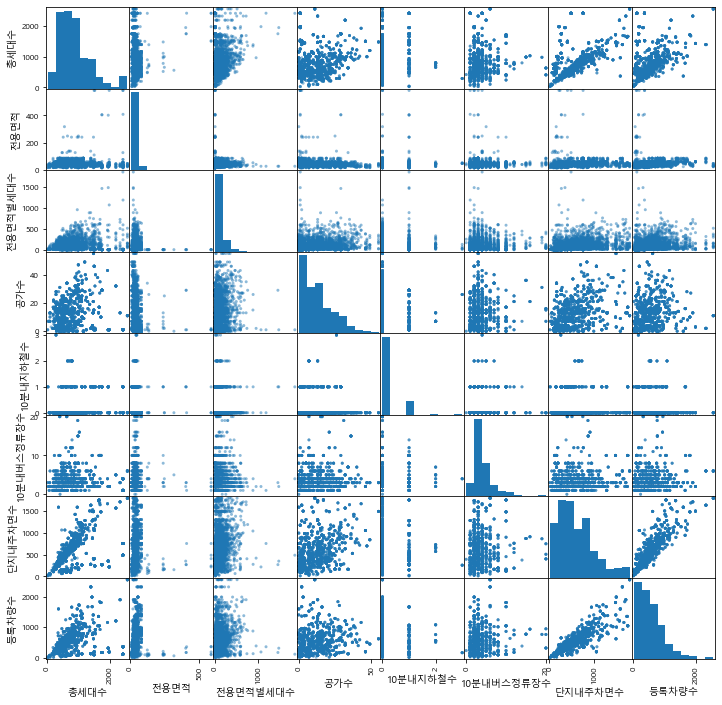

In [65]:
from pandas.plotting import scatter_matrix
scatter_matrix(train,figsize=(12, 12))

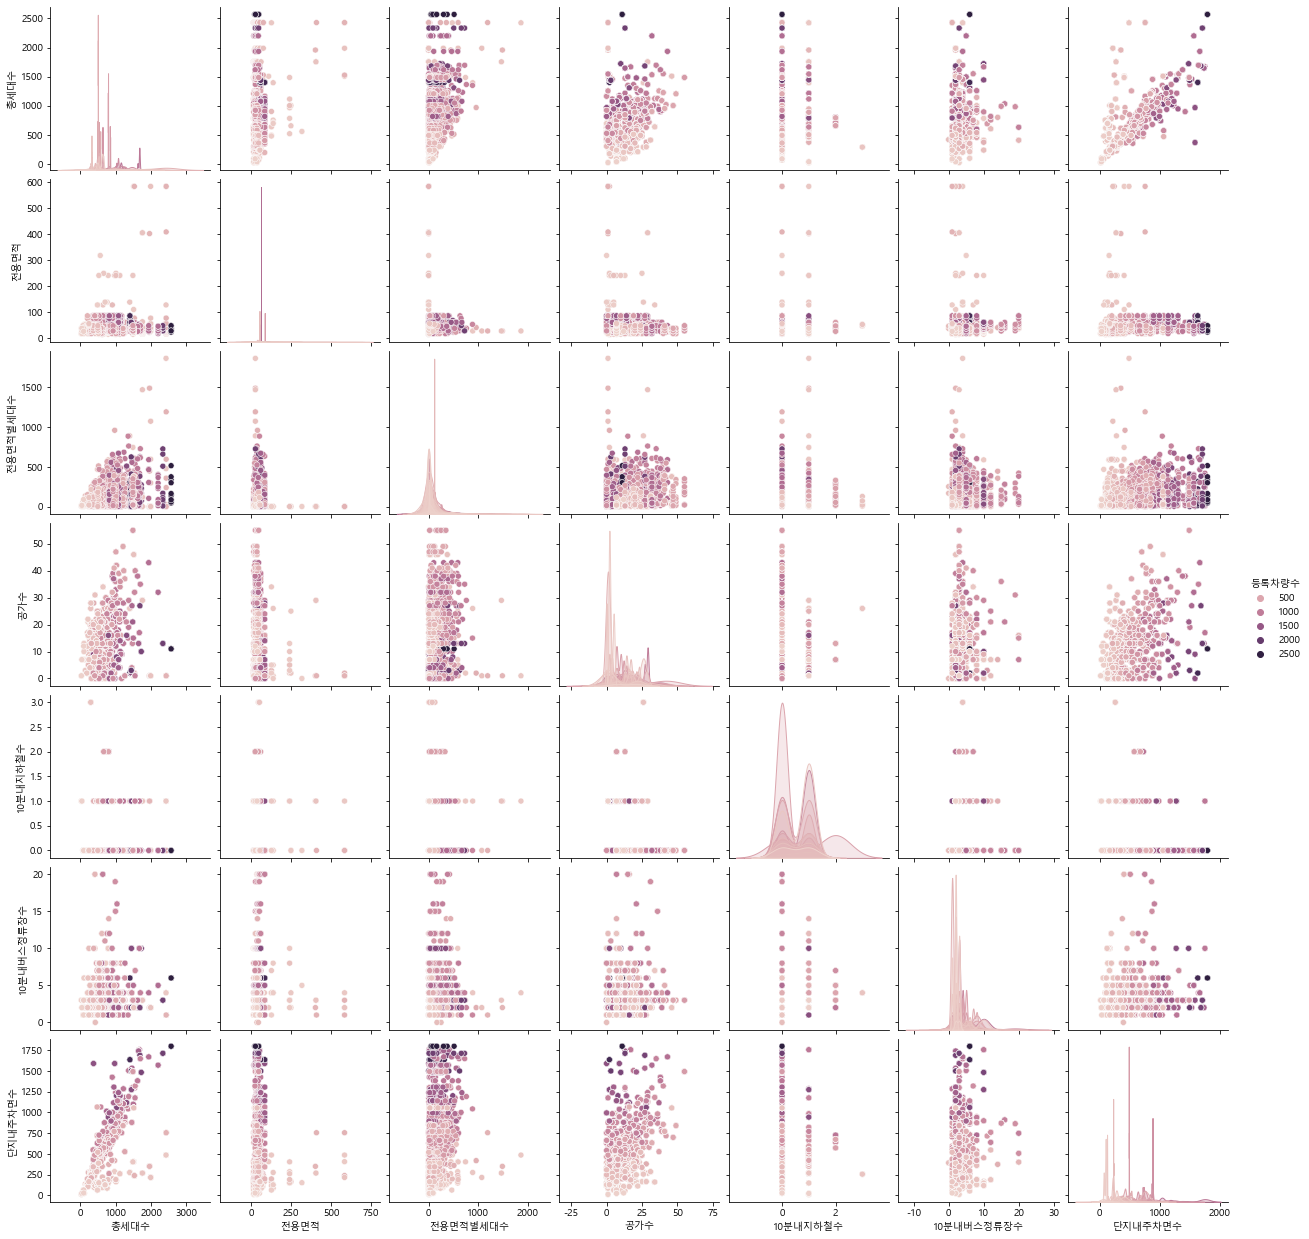

In [66]:
sns.pairplot(train, hue = '등록차량수')

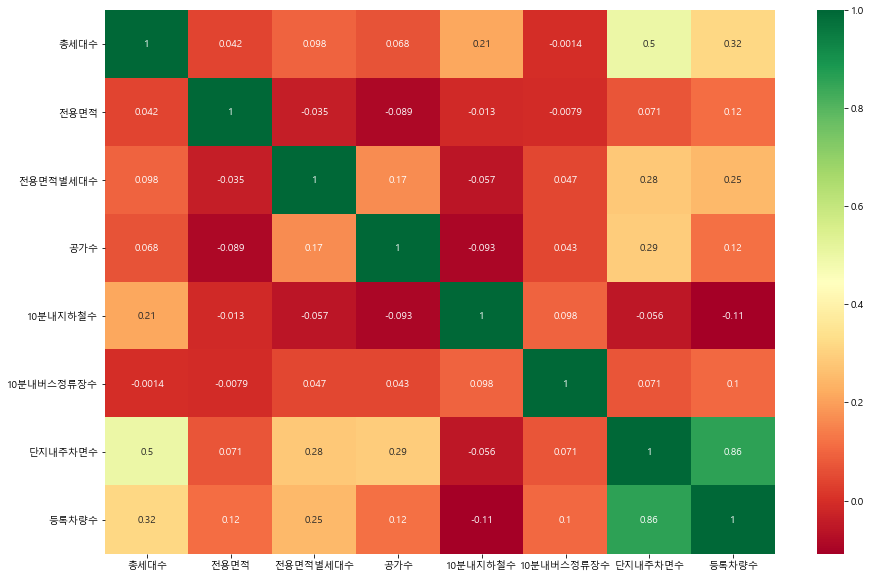

In [67]:
plt.figure(figsize=(15,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(train.corr(), annot=True,cmap ='RdYlGn')

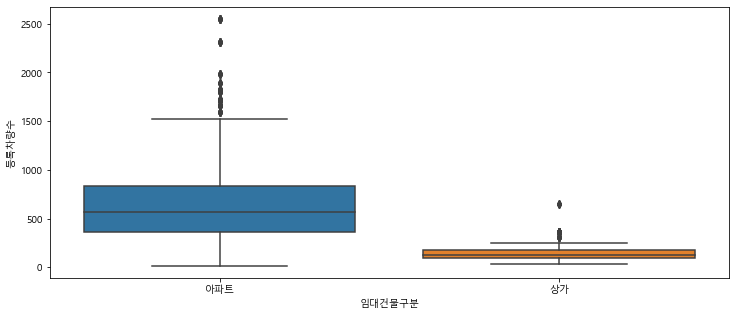

In [68]:
f, sub = plt.subplots(1, 1,figsize=(12.18,5))
sns.boxplot(x=train['임대건물구분'],y=train['등록차량수'], ax=sub)
sub.set(xlabel='임대건물구분', ylabel='등록차량수');

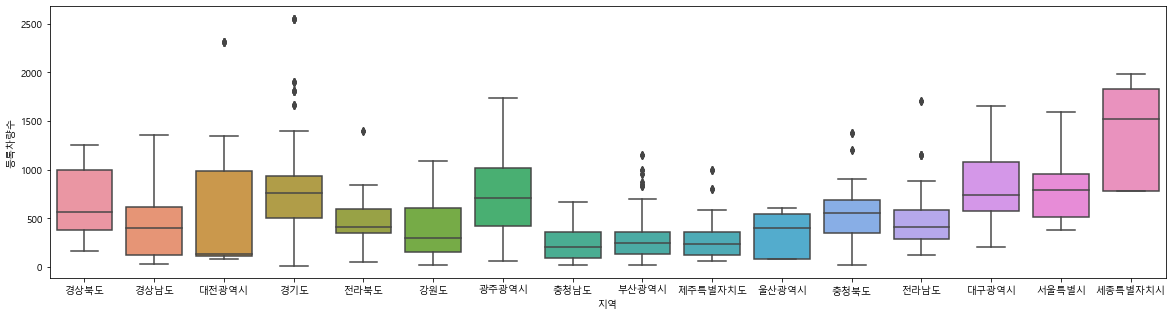

In [69]:
f, sub = plt.subplots(1, 1,figsize=(20,5))
sns.boxplot(x=train['지역'],y=train['등록차량수'], ax=sub)
sub.set(xlabel='지역', ylabel='등록차량수');

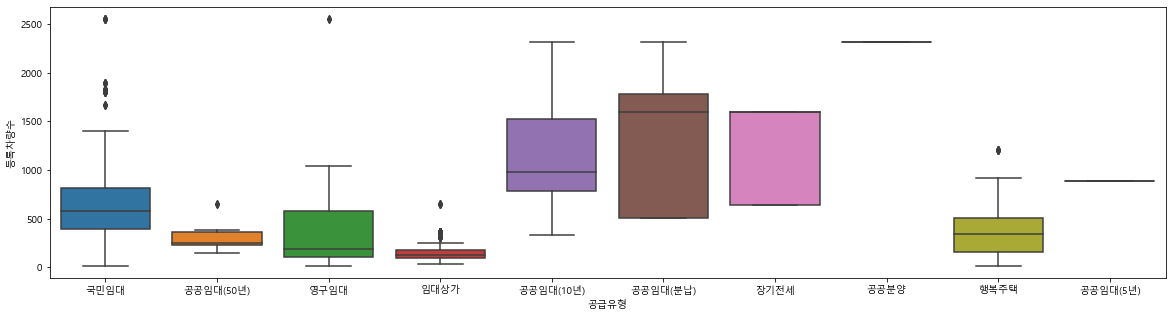

In [70]:
f, sub = plt.subplots(1, 1,figsize=(20,5))
sns.boxplot(x=train['공급유형'],y=train['등록차량수'], ax=sub)
sub.set(xlabel='공급유형', ylabel='등록차량수');

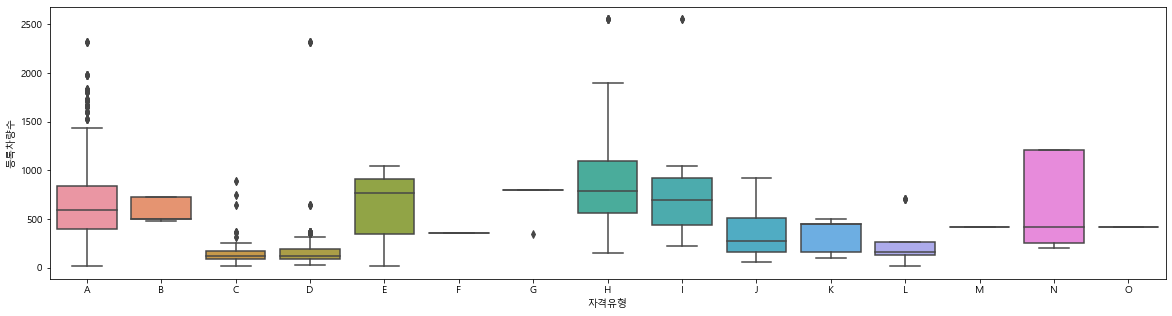

In [71]:
f, sub = plt.subplots(1, 1,figsize=(20,5))
sns.boxplot(x=train['자격유형'],y=train['등록차량수'], ax=sub)
sub.set(xlabel='자격유형', ylabel='등록차량수');

## 결측치 처리
* train :  임대보증금 , 임대료, 도보 10분거리 내 지하철역 수(환승노선 수 반영), 도보 10분거리 내 버스정류장 수 
* test : 자격유형, 임대보증금, 임대료, 임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영)

* train + test
    * 자격유형 :2
    * 임대보증금 :749
    * 임대료 :749
    * 도보 10분거리 내 지하철역 수(환승노선 수 반영):253
    * 도보 10분거리 내 버스정류장 수:4

In [72]:
all_df = pd.concat([train, test], join='inner')
all_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,L,-,-,0.0,1.0,467.0
1018,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,H,6872000,106400,0.0,2.0,300.0
1019,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,H,6872000,106400,0.0,2.0,300.0
1020,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,H,13410000,144600,0.0,2.0,300.0


In [73]:
all_df.isnull().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            2
임대보증금         749
임대료           749
10분내지하철수      253
10분내버스정류장수      4
단지내주차면수         0
dtype: int64

In [74]:
all_df['지역'].unique()

array(['경상북도', '경상남도', '대전광역시', '경기도', '전라북도', '강원도', '광주광역시', '충청남도',
       '부산광역시', '제주특별자치도', '울산광역시', '충청북도', '전라남도', '대구광역시', '서울특별시',
       '세종특별자치시'], dtype=object)

### 1) 결측치처리 : 자격유형 

In [75]:
all_df.loc[all_df['자격유형'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,37470,0.0,2.0,840.0
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,44770,0.0,2.0,173.0


In [76]:
grouped = all_df.groupby(['단지코드', '임대건물구분', '지역','공급유형'])
group1 = grouped.get_group( ('C2411', '아파트', '경상남도', '국민임대')  )
group1

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수
193,C2411,962,아파트,경상남도,국민임대,39.43,56,25.0,A,11992000,100720,0.0,2.0,840.0
194,C2411,962,아파트,경상남도,국민임대,39.72,336,25.0,A,11992000,100720,0.0,2.0,840.0
195,C2411,962,아파트,경상남도,국민임대,39.82,179,25.0,A,11992000,100720,0.0,2.0,840.0
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,37470,0.0,2.0,840.0
197,C2411,962,아파트,경상남도,국민임대,51.93,150,25.0,A,21586000,171480,0.0,2.0,840.0


In [77]:
group2 = grouped.get_group( ('C2253', '아파트', '강원도', '영구임대')  )
group2

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,44770,0.0,2.0,173.0
259,C2253,1161,아파트,강원도,영구임대,31.32,239,0.0,C,3731000,83020,0.0,2.0,173.0
260,C2253,1161,아파트,강원도,영구임대,31.32,149,0.0,C,3731000,83020,0.0,2.0,173.0


In [78]:
all_df.loc[ 196, "자격유형"] = 'A'
all_df.loc[ 258, "자격유형"] = 'C'
all_df.isnull().sum()

### 2) 결측치처리 : 임대보증금

In [100]:
#일단 Nan 0으로 처리
all_df['임대보증금'] = all_df['임대보증금'].fillna(0)
all_df.isnull().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            0
임대보증금           0
임대료             0
10분내지하철수      253
10분내버스정류장수      4
단지내주차면수         0
dtype: int64

## 결측치처리 : 임대료

In [95]:
#일단 Nan 0으로 처리
all_df['임대료'] = all_df['임대료'].fillna(0)
all_df.isnull().sum()

## 결측치처리 : 10분내버스정류장수 

In [80]:
all_df.loc[ all_df['10분내버스정류장수'].isnull(), :]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수
2315,C1649,575,아파트,경상남도,공공임대(10년),74.97,80,15.0,A,46000000,456000,NaN,NaN,1066.0
2316,C1649,575,아파트,경상남도,공공임대(10년),84.95,124,15.0,A,57000000,462000,NaN,NaN,1066.0
2317,C1649,575,아파트,경상남도,공공임대(10년),84.96,289,15.0,A,57000000,462000,NaN,NaN,1066.0
2318,C1649,575,아파트,경상남도,공공임대(10년),84.98,82,15.0,A,57000000,462000,NaN,NaN,1066.0


* 환산보증금 계산하여 환산보증금 기준으로 비슷한 정보의 10분내 지하철수와 버스정류장수 가지고 오기

In [103]:
print(all_df['임대료'].astype(int)+100)

TypeError: cannot convert the series to <class 'int'>

In [101]:
all_df['환산보증금'] = all_df['임대보증금'].astype(int)+(all_df['임대료'].astype(int)+100)

ValueError: invalid literal for int() with base 10: '-'

In [82]:
all_df['임대건물구분'].unique()

array(['아파트', '상가'], dtype=object)

In [90]:
# 모든 행을 표시하려면 max_rows를 DataFrame의 행 수보다 크게 설정하십시오.
# 데이터 프레임이 잘릴 때 10 개가 넘는 행을 표시하려면 min_rows를 10보다 크게 설정하십시오.
pd.set_option("display.max_rows", 100)
pd.get_option("display.max_rows")
pd.set_option("display.min_rows", 100)
pd.get_option("display.min_rows")

100

In [91]:
grouped = train.groupby(['임대건물구분', '지역'])
group1 = grouped.get_group( ('아파트', '경상남도')  )
group1

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,등록차량수
8,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0,205.0
9,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0,205.0
10,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,107130,0.0,3.0,624.0,205.0
11,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,149760,0.0,3.0,624.0,205.0
12,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,149760,0.0,3.0,624.0,205.0
13,C2515,545,아파트,경상남도,국민임대,51.97,106,17.0,A,23042000,190090,0.0,3.0,624.0,205.0
14,C2515,545,아파트,경상남도,국민임대,51.97,26,17.0,A,23042000,190090,0.0,3.0,624.0,205.0
92,C2576,405,아파트,경상남도,국민임대,46.90,313,19.0,A,19436000,161780,0.0,4.0,296.0,73.0
93,C2576,405,아파트,경상남도,국민임대,59.88,92,19.0,A,28252000,235420,0.0,4.0,296.0,73.0
131,C2416,560,아파트,경상남도,영구임대,26.34,360,0.0,C,3138000,69820,0.0,5.0,154.0,63.0


In [18]:
# 데이터 확인 후, 임의 처리 4
all_df.loc[ all_df['10분내버스정류장수'].isnull(), "10분내버스정류장수"] = 4

In [19]:
all_df.loc[ all_df['10분내버스정류장수'].isnull(), :]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수


In [20]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3974 entries, 0 to 1021
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   단지코드        3974 non-null   object 
 1   총세대수        3974 non-null   int64  
 2   임대건물구분      3974 non-null   object 
 3   지역          3974 non-null   object 
 4   공급유형        3974 non-null   object 
 5   전용면적        3974 non-null   float64
 6   전용면적별세대수    3974 non-null   int64  
 7   공가수         3974 non-null   float64
 8   자격유형        3974 non-null   int32  
 9   임대보증금       3225 non-null   object 
 10  임대료         3225 non-null   object 
 11  10분내지하철수    3721 non-null   float64
 12  10분내버스정류장수  3974 non-null   float64
 13  단지내주차면수     3974 non-null   float64
dtypes: float64(5), int32(1), int64(2), object(6)
memory usage: 530.2+ KB


In [21]:
all_df.isnull().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            0
임대보증금         749
임대료           749
10분내지하철수      253
10분내버스정류장수      0
단지내주차면수         0
dtype: int64

## 라벨인코딩

In [12]:
print(all_df.자격유형.unique())

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O']


In [13]:
mapping = { 'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 
            'F':6, 'G':7, 'H':8, 'I':9, 'J':10, 
            'K':11, 'L':12, 'M':13, 'N':14, 'O':15  }

all_df['자격유형'] =all_df['자격유형'].map(mapping).astype(int)

In [22]:
for c in all_df.columns:
    print(all_df[c].unique())

['C2483' 'C2515' 'C1407' 'C1945' 'C1470' 'C1898' 'C1244' 'C1171' 'C2073'
 'C2513' 'C1936' 'C2049' 'C2202' 'C1925' 'C2576' 'C1312' 'C1874' 'C2650'
 'C2416' 'C2013' 'C1424' 'C2100' 'C2621' 'C2520' 'C2319' 'C1616' 'C1704'
 'C2258' 'C1032' 'C2038' 'C1859' 'C1722' 'C1850' 'C2190' 'C1476' 'C1077'
 'C1068' 'C1983' 'C2135' 'C2034' 'C1109' 'C1497' 'C2289' 'C2597' 'C2310'
 'C1672' 'C2132' 'C1439' 'C1613' 'C2216' 'C1899' 'C1056' 'C2644' 'C1206'
 'C2481' 'C1718' 'C1655' 'C1430' 'C1775' 'C1519' 'C2221' 'C1790' 'C2109'
 'C1698' 'C1866' 'C1005' 'C1004' 'C1875' 'C2156' 'C2212' 'C2401' 'C2571'
 'C1175' 'C1833' 'C2445' 'C1885' 'C2368' 'C2016' 'C2371' 'C2536' 'C2538'
 'C1014' 'C1592' 'C1867' 'C2326' 'C1015' 'C1620' 'C1049' 'C2000' 'C2097'
 'C1668' 'C1689' 'C1234' 'C2514' 'C1368' 'C1057' 'C2336' 'C1026' 'C2256'
 'C1900' 'C2666' 'C2361' 'C1642' 'C1013' 'C2232' 'C1973' 'C2458' 'C2574'
 'C2133' 'C2096' 'C2010' 'C1879' 'C1131' 'C1468' 'C1213' 'C1173' 'C2492'
 'C2032' 'C2094' 'C1880' 'C2089' 'C1744' 'C2046' 'C

  322.  603.  610.  667.  636.   53.  250.   40.  300.]


In [23]:
gubun1 = {'아파트':1, '상가':2}
gubun2 = {'경상남도':1, '대전광역시':2, '경기도':3, '전라북도':4, '강원도':5,
          '광주광역시':6, '충청남도':7, '부산광역시':8, '제주특별자치도':9, '울산광역시':10,
          '충청북도':11, '전라남도':12, '경상북도':13, '대구광역시':14, '서울특별시':15, '세종특별자치시':16}

gubun3 = {'국민임대':1, '공공임대(50년)':2, '영구임대':3, '임대상가':4, '공공임대(10년)':5, 
          '공공임대(분납)':6, '장기전세':7, '공공분양':8, '행복주택':9, '공공임대(5년)':10}

all_df['임대건물구분_lbl'] = all_df['임대건물구분'].map(gubun1)
all_df['지역_lbl'] = all_df['지역'].map(gubun2)
all_df['공급유형_lbl'] = all_df['공급유형'].map(gubun3)

all_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,임대건물구분_lbl,지역_lbl,공급유형_lbl
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,1,15667000,103680,0.0,3.0,1425.0,1,13,1
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,1,15667000,103680,0.0,3.0,1425.0,1,13,1
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,1,27304000,184330,0.0,3.0,1425.0,1,13,1
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,1,27304000,184330,0.0,3.0,1425.0,1,13,1
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,1,27304000,184330,0.0,3.0,1425.0,1,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,12,-,-,0.0,1.0,467.0,1,1,9
1018,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,8,6872000,106400,0.0,2.0,300.0,1,4,1
1019,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,8,6872000,106400,0.0,2.0,300.0,1,4,1
1020,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,8,13410000,144600,0.0,2.0,300.0,1,4,1


In [24]:
all_df['단지코드']

0       C2483
1       C2483
2       C2483
3       C2483
4       C2483
        ...  
1017    C1267
1018    C2189
1019    C2189
1020    C2189
1021    C2189
Name: 단지코드, Length: 3974, dtype: object

In [25]:
all_df['단지코드'] = all_df['단지코드'].astype("category")
all_df['단지코드'] 

0       C2483
1       C2483
2       C2483
3       C2483
4       C2483
        ...  
1017    C1267
1018    C2189
1019    C2189
1020    C2189
1021    C2189
Name: 단지코드, Length: 3974, dtype: category
Categories (573, object): ['C1000', 'C1003', 'C1004', 'C1005', ..., 'C2680', 'C2688', 'C2691', 'C2692']

In [26]:
all_df['단지코드_lbl'] = all_df['단지코드'].cat.codes #카테고리를 정수로 변환cat.codes
all_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,임대건물구분_lbl,지역_lbl,공급유형_lbl,단지코드_lbl
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,1,15667000,103680,0.0,3.0,1425.0,1,13,1,491
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,1,15667000,103680,0.0,3.0,1425.0,1,13,1,491
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,1,27304000,184330,0.0,3.0,1425.0,1,13,1,491
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,1,27304000,184330,0.0,3.0,1425.0,1,13,1,491
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,1,27304000,184330,0.0,3.0,1425.0,1,13,1,491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,12,-,-,0.0,1.0,467.0,1,1,9,89
1018,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,8,6872000,106400,0.0,2.0,300.0,1,4,1,392
1019,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,8,6872000,106400,0.0,2.0,300.0,1,4,1,392
1020,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,8,13410000,144600,0.0,2.0,300.0,1,4,1,392


In [27]:
all_df_last = all_df.drop(['임대건물구분', '지역', '공급유형'] , axis=1)
all_df_last

,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,임대건물구분_lbl,지역_lbl,공급유형_lbl,단지코드_lbl
0,C2483,900,39.72,134,38.0,1,15667000,103680,0.0,3.0,1425.0,1,13,1,491
1,C2483,900,39.72,15,38.0,1,15667000,103680,0.0,3.0,1425.0,1,13,1,491
2,C2483,900,51.93,385,38.0,1,27304000,184330,0.0,3.0,1425.0,1,13,1,491
3,C2483,900,51.93,15,38.0,1,27304000,184330,0.0,3.0,1425.0,1,13,1,491
4,C2483,900,51.93,41,38.0,1,27304000,184330,0.0,3.0,1425.0,1,13,1,491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,C1267,675,36.77,126,38.0,12,-,-,0.0,1.0,467.0,1,1,9,89
1018,C2189,382,29.19,96,45.0,8,6872000,106400,0.0,2.0,300.0,1,4,1,392
1019,C2189,382,29.19,20,45.0,8,6872000,106400,0.0,2.0,300.0,1,4,1,392
1020,C2189,382,39.45,202,45.0,8,13410000,144600,0.0,2.0,300.0,1,4,1,392


In [28]:
for c in all_df_last.columns:
    print(all_df_last[c].unique())

['C2483', 'C2515', 'C1407', 'C1945', 'C1470', ..., 'C2456', 'C1266', 'C2152', 'C1267', 'C2189']
Length: 573
Categories (573, object): ['C2483', 'C2515', 'C1407', 'C1945', ..., 'C1266', 'C2152', 'C1267', 'C2189']
[ 900  545 1216  755  696  566 1722  624  361  754  240  688  623  601
  405  518  619  875  560  595  625  880 1396  970  606 1507  639  965
  946  785 2424  809  388 1013  453  861  806  903 1116 1486 1957  802
 1527 1005 1988 1350 2428 1755  840  390  451  410  779  693  753  498
 1533  711  420  590  657  495  460  338 1144  521 1003  306  697  213
  481  468 1364  800  830  775  261  474   72 1473  996  870  678  632
  961 1232  676 1300  998  493 1117  307  501  896  458  290  409  586
 1084 1174  270 1308  355  384  853  492  901  815  312  571  594  944
  635  962  822 1129 1479  330  386  456  642  302  757  705 1072  375
 1018  341  416  708  475  662 1002  462  781  496  630  512  534  762
  890  494  550  383  882  615  470  477 1260  773 1124  324 1497  531
  389  

In [29]:
train.shape, test.shape

((2952, 15), (1022, 14))

In [30]:
train_df = all_df_last.iloc[0:2952,:]
test_df = all_df_last.iloc[2952:,:]

train_df.shape, test_df.shape
train_df
train_df = pd.concat([train_df, train['등록차량수'] ], axis=1)
train_df

,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,임대건물구분_lbl,지역_lbl,공급유형_lbl,단지코드_lbl,등록차량수
0,C2483,900,39.72,134,38.0,1,15667000,103680,0.0,3.0,1425.0,1,13,1,491,1015.0
1,C2483,900,39.72,15,38.0,1,15667000,103680,0.0,3.0,1425.0,1,13,1,491,1015.0
2,C2483,900,51.93,385,38.0,1,27304000,184330,0.0,3.0,1425.0,1,13,1,491,1015.0
3,C2483,900,51.93,15,38.0,1,27304000,184330,0.0,3.0,1425.0,1,13,1,491,1015.0
4,C2483,900,51.93,41,38.0,1,27304000,184330,0.0,3.0,1425.0,1,13,1,491,1015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,C2532,239,49.20,19,7.0,1,11346000,116090,0.0,1.0,166.0,1,5,1,515,146.0
2948,C2532,239,51.08,34,7.0,1,14005000,142310,0.0,1.0,166.0,1,5,1,515,146.0
2949,C2532,239,51.73,34,7.0,1,14005000,142310,0.0,1.0,166.0,1,5,1,515,146.0
2950,C2532,239,51.96,114,7.0,1,14005000,142310,0.0,1.0,166.0,1,5,1,515,146.0


In [31]:
from sklearn.model_selection import train_test_split
import seaborn as sns

In [32]:
train_df.corr()['등록차량수']

총세대수          0.316703
전용면적          0.115453
전용면적별세대수      0.247085
공가수           0.118121
자격유형         -0.154021
10분내지하철수     -0.108592
10분내버스정류장수    0.103825
단지내주차면수       0.859216
임대건물구분_lbl   -0.449189
지역_lbl        0.075010
공급유형_lbl     -0.131851
단지코드_lbl     -0.099950
등록차량수         1.000000
Name: 등록차량수, dtype: float64

<AxesSubplot:>

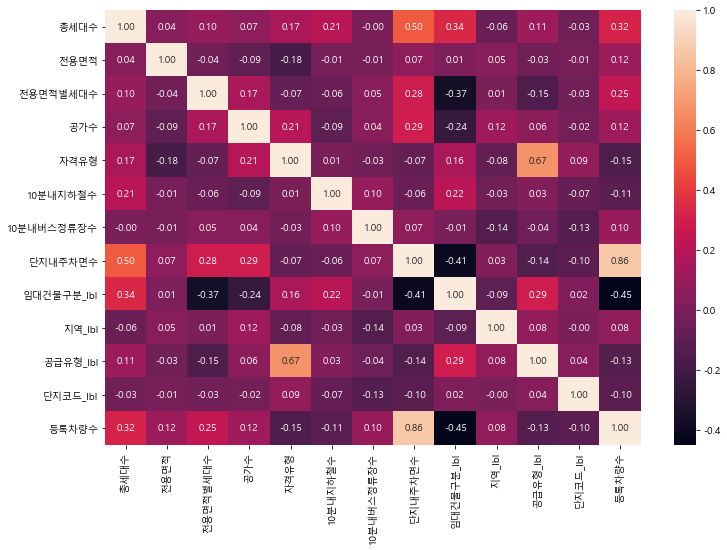

In [33]:
plt.figure(figsize=(12,8))
sns.heatmap(train_df.corr(), annot=True, fmt=".2f")

In [45]:
sel = [ '총세대수', '전용면적', '전용면적별세대수', '공가수', '자격유형', '10분내버스정류장수', 
       '단지내주차면수', '임대건물구분_lbl', '지역_lbl', '공급유형_lbl',
       '단지코드_lbl']

X = train_df[sel]
y = train_df['등록차량수']
test_X = test_df[sel]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.1, 
                                                    random_state=0)
print(X.isnull().sum())
print(X_test)

총세대수          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
10분내버스정류장수    0
단지내주차면수       0
임대건물구분_lbl    0
지역_lbl        0
공급유형_lbl      0
단지코드_lbl      0
dtype: int64
       단지코드  총세대수   전용면적  전용면적별세대수   공가수  자격유형     임대보증금     임대료  10분내지하철수  \
0     C1072   754  39.79       116  14.0     8  22830000  189840       0.0   
1     C1072   754  46.81        30  14.0     1  36048000  249930       0.0   
2     C1072   754  46.90       112  14.0     8  36048000  249930       0.0   
3     C1072   754  46.90       120  14.0     8  36048000  249930       0.0   
4     C1072   754  51.46        60  14.0     8  43497000  296780       0.0   
...     ...   ...    ...       ...   ...   ...       ...     ...       ...   
1017  C1267   675  36.77       126  38.0    12         -       -       0.0   
1018  C2189   382  29.19        96  45.0     8   6872000  106400       0.0   
1019  C2189   382  29.19        20  45.0     8   6872000  106400       0.0   
1020  C2189   382  39.45       

In [35]:
from sklearn.linear_model import Lasso, Ridge
import numpy as np
from sklearn.model_selection import train_test_split

In [36]:
model = Lasso()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print("학습(score) :", model.score(X_train, y_train) ) # 결정계수
print("테스트(score) :", model.score(X_test, y_test) ) # 결정계수

학습(score) : 0.7913946032051572
테스트(score) : 0.7911442719411104


In [48]:
#실제 test 파일 만들어 올리기
sel = [ '총세대수', '전용면적', '전용면적별세대수', '공가수', '자격유형', '10분내버스정류장수', 
       '단지내주차면수', '임대건물구분_lbl', '지역_lbl', '공급유형_lbl',
       '단지코드_lbl']

X = train_df[sel]
y = train_df['등록차량수']
test_X = test_df[sel]

model = Lasso()
model.fit(X, y)
pred = model.predict(test_X)

test['등록차량수']=pred
test['단지별차량수평균']=test.groupby('단지코드')['등록차량수'].transform(np.mean)

# test 1022개의 단지코드 중복을 빼주기 그리고 가장 첫번째 값만 남기기
test_new = test.drop_duplicates(['단지코드'],keep='first').reset_index()
# 결론적으로 150개만 남음.

#150개 코드별 차량수 평균을 sub_df로 만든다.
sub_df = test_new[['단지코드','단지별차량수평균']]

#컬럼명을 일치시킨다.
sub_df.columns =['code','num']
sub_df.to_csv('4th_lasso_0719.csv',index=False)



## 점수 : 115.32019 , Ranking : 238